# Name: Parth Verma
# Batch: COE-08
# Roll Number: 101983047
### Data Science Project: Insurance Cost Prediction using hybrid machine learning model

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans

In [2]:
# Reading Dataset

data = pd.read_csv('insurance.csv')

In [3]:
# Viewing data

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Checking for Null Values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Getting the summary of Data

data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# One hot encoding and label encoding

data.smoker = data.smoker.map(dict( yes = 1, no = 0))
sex_col = pd.get_dummies(data.sex, prefix = 'sex')
region_col = pd.get_dummies(data.region, prefix = 'region')

data = pd.concat([data, sex_col, region_col], axis = 1)
data.drop(columns = ['sex', 'region'], inplace = True)

In [7]:
# Viewing data

data.head()

,age,bmi,children,smoker,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,1,0,0,0,0,1
1,18,33.770,1,0,1725.55230,0,1,0,0,1,0
2,28,33.000,3,0,4449.46200,0,1,0,0,1,0
3,33,22.705,0,0,21984.47061,0,1,0,1,0,0
4,32,28.880,0,0,3866.85520,0,1,0,1,0,0


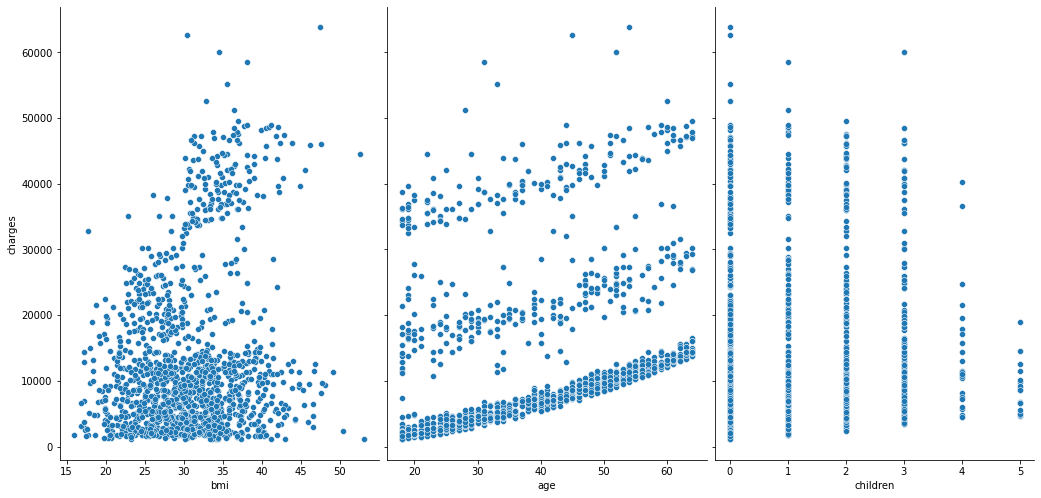

In [8]:
# Visualise the relationship between the features and the response using scatterplots

sns.pairplot(data, x_vars=['bmi','age','children'], y_vars = 'charges', height = 7, aspect = 0.7, kind = 'scatter')

<AxesSubplot:>

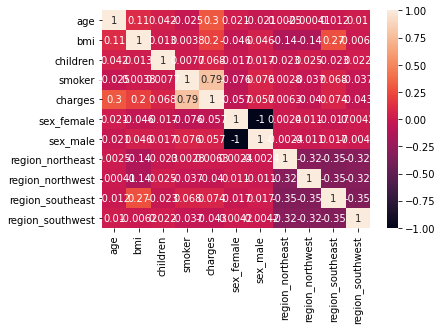

In [9]:
# Visualizing heatmap

sns.heatmap(data.corr(), annot = True)

<AxesSubplot:xlabel='charges', ylabel='Density'>

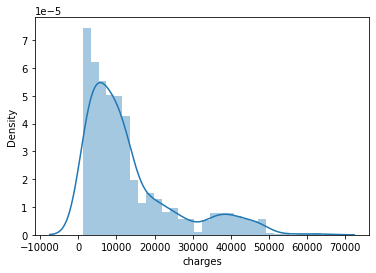

In [10]:
# Visualizing density plot

sns.distplot(data.charges)

In [11]:
# Viewing column names

data.columns

Index(['age', 'bmi', 'children', 'smoker', 'charges', 'sex_female', 'sex_male',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [12]:
# Putting feature variable to X

X = data[['age', 'bmi', 'children', 'smoker', 'sex_female', 'sex_male', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]

# Putting response variable to y

y = data['charges']

In [13]:
# Test - Train split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.65, random_state = 1234)

In [14]:
# Viewing shapes of data

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(869, 10)
(469, 10)
(869,)
(469,)


In [15]:
# Changing column names

X_train.columns = ['age', 'bmi', 'children', 'smoker', 'sex_female', 'sex_male', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
y_train.columns = ['charges']

# Preparing training dataset

train_df = pd.concat([X_train, y_train], axis = 1)

In [16]:
# Comparing various models using Pycaret

setup(data = data, target = 'charges', session_id = 1611)
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,3999.1487,34539676.8000,5845.7368,0.7481,0.5595,0.3949,0.2800
huber,Huber Regressor,3263.9527,44026104.9560,6574.9393,0.6697,0.5221,0.2206,0.0180
omp,Orthogonal Matching Pursuit,5545.9366,53932517.2208,7315.7533,0.6073,0.7130,0.8471,0.0050
par,Passive Aggressive Regressor,4884.3772,63235283.9390,7849.9781,0.5556,0.6005,0.4241,0.0120
en,Elastic Net,7136.5618,87105165.2000,9285.2926,0.3820,0.7155,0.8792,0.0050
knn,K Neighbors Regressor,7694.6486,125201076.8000,11132.4303,0.1075,0.8271,0.8994,0.0060
lar,Least Angle Regression,8721.9911,399048119.0865,12220.7763,-2.6308,0.7744,1.2320,0.0060


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [17]:
# Traing Linear Model as a whole

lm = LinearRegression()
lm.fit(X_train, y_train)

# Making predictions using the model

y_pred = lm.predict(X_test)

# Checking R2 score
r_squared = r2_score(y_test, y_pred)
print('r_square_value :',r_squared)

r_square_value : 0.7461348142124099


## Methodology: 
<br>
<div style="text-align: justify">A variety of different regression models were tested for the given dataset including Linear, Huber, Orthogonal Matching Point, etc. (refer table below) and linear regression (multivarialte) was found to be the best model among all applied models having a R2 score of 0.7466. In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables.</div>

![image](image1.png)

In [18]:
# Hybrid clustering approach: finding best number of clusters using comparison of R2 scores by following hybrid model on training data, and making predictions on test data.

all_centers = []
all_rsquared = []
all_lms = []

for clusters in range(1, 31):
    
    kmeans = KMeans(n_clusters = clusters, random_state = 16).fit(X_train)
    
    all_centers.append(kmeans.cluster_centers_)
    
    dframes = []

    for i in range(clusters):
        dframes.append(pd.DataFrame(columns = train_df.columns))

    labels = list(kmeans.labels_)

    for i in range(len(labels)):
        dframes[labels[i]].loc[len(dframes[labels[i]].index)] = list(train_df.iloc[i,:].values)

    Xs = []
    ys = []
    lms = []

    for i in range(clusters):
        Xs.append(dframes[i][['age', 'bmi', 'children', 'smoker', 'sex_female', 'sex_male', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']])
        ys.append(dframes[i][['charges']])
        lms.append(LinearRegression())
        lms[i].fit(Xs[i], ys[i])

    all_lms.append(lms)
    
    y_pred = []

    for i in range(len(X_test)):
        temp = np.array(X_test.iloc[i,:]).reshape(1, -1)
        y_pred.append(lms[int(kmeans.predict(temp))].predict(temp))

    y_pred = np.array(y_pred).reshape(X_test.shape[0], )

    r_squared = r2_score(y_test, y_pred)
    
    all_rsquared.append(r_squared)
    
    print("Clusters : " + str(clusters) + ", r_square_value : ", r_squared, "\n")

Clusters : 1, r_square_value :  0.74613481421241 

Clusters : 2, r_square_value :  0.7497451727608337 

Clusters : 3, r_square_value :  0.7417756263168582 

Clusters : 4, r_square_value :  0.7658618845596769 

Clusters : 5, r_square_value :  0.8001709313468982 

Clusters : 6, r_square_value :  0.7993380772247551 

Clusters : 7, r_square_value :  0.8227194699459552 

Clusters : 8, r_square_value :  0.833354559003959 

Clusters : 9, r_square_value :  0.8216283613734934 

Clusters : 10, r_square_value :  0.824571529410496 

Clusters : 11, r_square_value :  0.832156686991159 

Clusters : 12, r_square_value :  0.8220546608830319 

Clusters : 13, r_square_value :  0.8268507444938628 

Clusters : 14, r_square_value :  0.8367123798297456 

Clusters : 15, r_square_value :  0.8258409873513854 

Clusters : 16, r_square_value :  0.8126930364246516 

Clusters : 17, r_square_value :  0.8071594306129947 

Clusters : 18, r_square_value :  0.8150542551809553 

Clusters : 19, r_square_value :  0.8109525

In [19]:
# Saving appropriate cluster information and linear model informations accordingly.

max_index = all_rsquared.index(max(all_rsquared))
output_clusters = pd.DataFrame(columns = X_train.columns)
output_lms = pd.DataFrame(columns = X_train.columns.insert(0, "Intercept"))

for i in range(max_index + 1):
    output_clusters.loc[len(output_clusters.index)] = list(all_centers[max_index][i])
    output_lms.loc[len(output_lms.index)] = list(all_lms[max_index][i].intercept_) + list(all_lms[max_index][i].coef_.tolist()[0])
    
output_clusters.to_csv("ClusterInfo.csv", index = False)
output_lms.to_csv("LMSInfo.csv", index = False)